In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("salary.csv",index_col=0)

In [5]:
data.head()

,Position,Level,Salary
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000
4,Manager,4,80000
5,Business Analyst,1,85000


In [6]:
data['Level'].value_counts()

4     2
3     2
2     2
1     2
10    1
9     1
8     1
7     1
6     1
5     1
Name: Level, dtype: int64

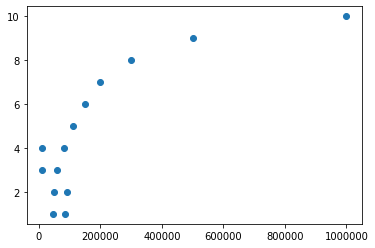

In [8]:
plt.plot(data['Salary'],data['Level'],'o')

In [9]:
data.shape

(14, 3)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [11]:
poly = PolynomialFeatures(degree=2)

In [12]:
features = data[['Salary']]
target = data['Level']

In [14]:
poly_v = poly.fit_transform(features)

In [15]:
model = LinearRegression()

In [16]:
model.fit(poly_v,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred = model.predict(poly_v)

In [18]:
pred

array([2.72162583, 2.83240251, 3.05165112, 3.4809294 , 3.58632835,
       3.69095907, 1.92467825, 1.93632826, 4.10179946, 4.88660449,
       5.7984687 , 7.39172358, 9.65633914, 9.94016184])

In [19]:
target

1      1
2      2
3      3
4      4
5      1
6      2
7      3
8      4
9      5
10     6
11     7
12     8
13     9
14    10
Name: Level, dtype: int64

In [20]:
r2_score(target,pred)

0.7951942254074471

In [22]:
round(pred[0])

3.0

In [23]:
pred_1 = pd.Series(pred).apply(lambda x : round(x))

In [24]:
pred_1

0      3
1      3
2      3
3      3
4      4
5      4
6      2
7      2
8      4
9      5
10     6
11     7
12    10
13    10
dtype: int64

In [25]:
r2_score(target,pred_1)

0.7438485804416404

In [26]:
mean_absolute_error(target,pred)

1.0770437160648576

In [29]:
poly4 = PolynomialFeatures(degree=4)

In [30]:
poly4

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [31]:
poly4_v = poly4.fit_transform(features)

In [32]:
poly4_v

array([[1.00000000e+00, 4.50000000e+04, 2.02500000e+09, 9.11250000e+13,
        4.10062500e+18],
       [1.00000000e+00, 5.00000000e+04, 2.50000000e+09, 1.25000000e+14,
        6.25000000e+18],
       [1.00000000e+00, 6.00000000e+04, 3.60000000e+09, 2.16000000e+14,
        1.29600000e+19],
       [1.00000000e+00, 8.00000000e+04, 6.40000000e+09, 5.12000000e+14,
        4.09600000e+19],
       [1.00000000e+00, 8.50000000e+04, 7.22500000e+09, 6.14125000e+14,
        5.22006250e+19],
       [1.00000000e+00, 9.00000000e+04, 8.10000000e+09, 7.29000000e+14,
        6.56100000e+19],
       [1.00000000e+00, 1.00000000e+04, 1.00000000e+08, 1.00000000e+12,
        1.00000000e+16],
       [1.00000000e+00, 1.05000000e+04, 1.10250000e+08, 1.15762500e+12,
        1.21550625e+16],
       [1.00000000e+00, 1.10000000e+05, 1.21000000e+10, 1.33100000e+15,
        1.46410000e+20],
       [1.00000000e+00, 1.50000000e+05, 2.25000000e+10, 3.37500000e+15,
        5.06250000e+20],
       [1.00000000e+00, 2.0000

In [33]:
model.fit(poly4_v,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.coef_

array([ 0.00000000e+00,  7.70142030e-15,  1.79078313e-10, -4.38319654e-16,
        2.67007683e-22])

In [37]:
pred4 = model.predict(poly4_v)

In [38]:
r2_score(target,pred4)

0.8440020948253247

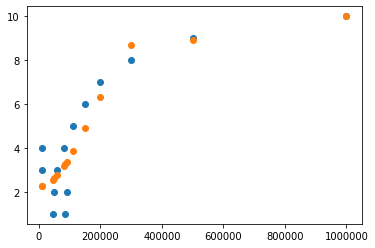

In [39]:
plt.plot(data['Salary'],data['Level'],'o')
plt.plot(data['Salary'],pred4,'o')
plt.show()

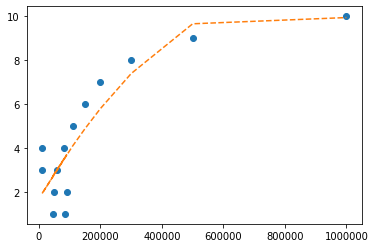

In [41]:
plt.plot(data['Salary'],data['Level'],'o')
plt.plot(data['Salary'],pred,'--')
plt.show()

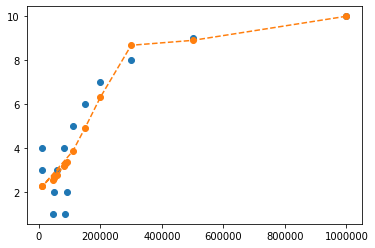

In [43]:
plt.plot(data['Salary'],data['Level'],'o')
plt.plot(data['Salary'],pred4,'o--')
plt.show()

In [44]:
mean_absolute_error(target,pred4)

0.933112328525039

In [46]:
data['Salary'].value_counts()

300000     1
10000      1
1000000    1
50000      1
150000     1
60000      1
200000     1
85000      1
110000     1
500000     1
10500      1
90000      1
45000      1
80000      1
Name: Salary, dtype: int64